## Project: Detection of Toxic Comments

### Step 1: Download FastText embeddings
### Step 2: Using function get_embeddings() create embeddings index

In [1]:
# Train data
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt

train = pd.read_csv('train.csv', index_col = 0)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [2]:
# Test data
test = pd.read_csv('test.csv', index_col = 0)
test_labels = pd.read_csv('test_labels.csv', index_col = 0)
print(test_labels.head())
labelled_test = test.join(test_labels)
disclosed = labelled_test.toxic>-1
print(disclosed .mean(),'% of test is labelled')
train = train.append(labelled_test[disclosed])
test = labelled_test[~disclosed][['comment_text']]
print(train.shape,test.shape)
#train.to_csv('tc_train.csv')
#test.to_csv('tc_test.csv')

                  toxic  severe_toxic  obscene  threat  insult  identity_hate
id                                                                           
00001cee341fdb12     -1            -1       -1      -1      -1             -1
0000247867823ef7     -1            -1       -1      -1      -1             -1
00013b17ad220c46     -1            -1       -1      -1      -1             -1
00017563c3f7919a     -1            -1       -1      -1      -1             -1
00017695ad8997eb     -1            -1       -1      -1      -1             -1
0.41770912224804785 % of test is labelled
(223549, 7) (89186, 1)


In [3]:
test_labels.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,
00001cee341fdb12,-1,-1,-1,-1,-1,-1
0000247867823ef7,-1,-1,-1,-1,-1,-1
00013b17ad220c46,-1,-1,-1,-1,-1,-1
00017563c3f7919a,-1,-1,-1,-1,-1,-1
00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [4]:
test_labels.shape

(89186, 1)

In [5]:
for col in test_labels.columns: 
    print(col) 

toxic
severe_toxic
obscene
threat
insult
identity_hate


In [6]:
def get_embeddings(file_name):
    embeddings_index = {}
    with open(file_name, encoding="utf8") as f:
        for line in f:
            # remove white spaces and split
            values = line.rstrip().split(' ')
            if len(values) > 2:
                embeddings_index[values[0]] = np.asarray(values[1:], dtype="float32")
    return embeddings_index

In [7]:
embeddings_index = get_embeddings('crawl-300d-2M.vec')

In [8]:
print(list(embeddings_index.keys())[:25])
ke,va = list(embeddings_index.items())[0]
print('\nFirst key: ',ke,'\n\nVector length: ',len(va),'\n\nVector for first key: ',va)

[',', 'the', '.', 'and', 'to', 'of', 'a', 'in', 'is', 'for', 'that', 'I', 'it', 'on', 'with', ')', ':', '"', '(', 'The', 'you', 'was', 'are', 'or', 'this']

First key:  , 

Vector length:  300 

Vector for first key:  [-2.820e-02 -5.570e-02 -4.510e-02 -4.340e-02  7.120e-02 -8.550e-02
 -1.085e-01 -5.610e-02 -4.523e-01 -2.020e-02  9.750e-02  1.047e-01
  1.962e-01 -6.930e-02  2.130e-02 -2.350e-02  1.336e-01 -4.200e-02
 -5.640e-02 -7.980e-02  4.240e-02 -4.090e-02 -5.360e-02 -2.520e-02
  1.350e-02  6.400e-03  1.235e-01  4.610e-02  1.200e-02 -3.720e-02
  6.500e-02  4.100e-03 -1.074e-01 -2.630e-02  1.133e-01 -2.900e-03
  6.710e-02  1.065e-01  2.340e-02 -1.600e-02  7.000e-03  4.355e-01
 -7.520e-02 -4.328e-01  4.570e-02  6.040e-02 -7.400e-02 -5.500e-03
 -8.900e-03 -2.926e-01 -5.450e-02 -1.519e-01  9.900e-02 -1.930e-02
 -5.000e-03  5.110e-02  4.040e-02  1.023e-01 -1.280e-02  4.880e-02
 -1.567e-01 -7.590e-02 -1.900e-02  1.442e-01  4.700e-03 -1.860e-02
  1.400e-02 -3.850e-02 -8.530e-02  1.572e-01 

In [9]:
for word in [',','!','!!',"it's","I'll",'*','>','¿','£',"'","’"]:
    print(word, word in embeddings_index.keys())

, True
! True
!! False
it's True
I'll True
* True
> True
¿ True
£ True
' True
’ True


In [10]:
import pickle
from sklearn.model_selection import train_test_split
types = list(train)[1:]
print(types)

# convert each vector of labels to the string
labels = train[types].astype(str).apply(lambda x: ''.join(x),axis=1)
print('Labels: \n',labels.head())
# aggregate rare combinations if any
count = labels.value_counts()
rare = count.index[count<=2]
labels[np.isin(labels.values,rare)] = 'rare'
print('\nCounts of labels: \n',labels.value_counts())
train_index, val_index = train_test_split(train.index, test_size=0.2, 
                                      stratify = labels, random_state=0)
# save train and validation indices for further calculations
fname = 'train_val_split.pkl'
with open(fname, 'wb') as f: pickle.dump([train_index, val_index], f, -1),

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
Labels: 
 id
0000997932d777bf    000000
000103f0d9cfb60f    000000
000113f07ec002fd    000000
0001b41b1c6bb37e    000000
0001d958c54c6e35    000000
dtype: object

Counts of labels: 
 000000    201081
100000      7376
101010      5732
101000      2612
100010      1754
111010      1165
101011       979
111011       381
001000       366
000010       365
100011       215
100001       203
101110       196
001010       196
111000       186
100100       163
111110        88
101111        81
000001        68
101001        55
111111        45
110000        41
000011        32
000100        27
100110        25
001011        19
101100        17
110010        14
100101        11
110100        11
111100         8
111001         7
110011         7
110101         5
rare           5
000110         4
001001         3
110001         3
100111         3
dtype: int64


### Step 3: Preprocess text with the function preprocess() 
### Step 4: Using CountVectorizer from sklearn package create the vocabulary of all words from comments except rare ones. 

In [11]:
import string
trans_table = str.maketrans({key: ' ' for key in string.digits + '\r\n' +
                             string.punctuation.replace("\'",'')})
def preprocess(text):
    return ' '.join(text.lower().translate(trans_table).split(' '))

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

UNKNOWN_PROXY = 'unknown'
MIN_WORD_OCCURRENCE = 5

train['comment_text'] = train.comment_text.apply(preprocess)
print("Creating the vocabulary of words occurred more than", MIN_WORD_OCCURRENCE)

vectorizer = CountVectorizer(lowercase=False, token_pattern="\S+", 
                             min_df=MIN_WORD_OCCURRENCE)
vectorizer.fit(train.comment_text)

top_words = set(vectorizer.vocabulary_.keys())
top_words.add(UNKNOWN_PROXY)
print(len(top_words),'top words')

Creating the vocabulary of words occurred more than 5
45259 top words


In [13]:
print('First 10 out of "top_words": \n',list(top_words)[:10])
print('\nIs "unknown" in top_words? \n','unknown' in top_words)

First 10 out of "top_words": 
 ['inheritance', 'timing', 'interaction', 'whitespace', 'considerable', 'trad', 'dramatic', 'discard', 'vpn', 'gerald']

Is "unknown" in top_words? 
 True


### Step 5: Prepare input data for neural network

In [14]:
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.preprocessing import text, sequence

Using TensorFlow backend.


In [15]:
tokenizer = Tokenizer(filters="")
tokenizer.fit_on_texts(train.comment_text)
print(tokenizer)

In [16]:
word_index = tokenizer.word_index
print(len(word_index))
list(word_index.items())[:16]

280518


[('the', 1),
 ('to', 2),
 ('of', 3),
 ('and', 4),
 ('a', 5),
 ('you', 6),
 ('i', 7),
 ('is', 8),
 ('that', 9),
 ('in', 10),
 ('it', 11),
 ('for', 12),
 ('this', 13),
 ('not', 14),
 ('on', 15),
 ('be', 16)]

In [17]:
MAX_SEQUENCE_LENGTH = 100
seq = tokenizer.texts_to_sequences(train.comment_text)
data = pad_sequences(seq,maxlen=MAX_SEQUENCE_LENGTH,padding='post',
                     truncating='post')
with open('toxic_data.pkl','wb') as f: pickle.dump(data, f, -1)

print('\nFirst 2 sequences in `seq`: ',seq[:2])
print('\nShape of `data`: ',data.shape)
print('\nFirst prepared text in `data`:',data[0])


First 2 sequences in `seq`:  [[676, 77, 1, 133, 130, 177, 30, 666, 4436, 11406, 1126, 85, 349, 51, 2184, 12587, 50, 6354, 15, 59, 2567, 148, 7, 2795, 33, 116, 1196, 15967, 2453, 4, 47, 60, 247, 1, 359, 31, 1, 41, 27, 143, 71, 3503, 89], [121402, 52, 2765, 13, 466, 3656, 71, 4530, 2696, 21, 93, 41, 968, 196]]

Shape of `data`:  (223549, 100)

First prepared text in `data`: [  676    77     1   133   130   177    30   666  4436 11406  1126    85
   349    51  2184 12587    50  6354    15    59  2567   148     7  2795
    33   116  1196 15967  2453     4    47    60   247     1   359    31
     1    41    27   143    71  3503    89     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [16]:
mlist=['word_1','word_2','word_3']
moveIter=iter(mlist)
print(next(moveIter,'enough'))
print(next(moveIter,'enough'))
print(next(moveIter,'enough'))
print(next(moveIter,'enough'))
print(next(moveIter,'enough'))

word_1
word_2
word_3
enough
enough


In [18]:
embeddings_dim = len(next(iter(embeddings_index.values())))
embeddings_dim

300

In [19]:
def get_embedding_matrix(word_index,embeddings_index):
    nb_words = len(word_index) + 1 # +1 since min(word_index.values())=1
    embedding_matrix = np.zeros((nb_words,embeddings_dim))
    unknown = 0
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is None: unknown += 1
        else: embedding_matrix[i] = embedding_vector
    return embedding_matrix, unknown

In [20]:
def make_save_emb_layer(word_index,embeddings_index,layer_file_name):
    embedding_matrix,unknown = get_embedding_matrix(word_index,embeddings_index)
    embedding_layer = Embedding(embedding_matrix.shape[0],embedding_matrix.shape[1],
                                weights=[embedding_matrix],trainable=False)
    with open(layer_file_name,'wb') as f: 
        pickle.dump(embedding_layer, f, -1)
    return unknown

EMBEDDING_LAYER_FILE = 'toxic_embed_layer.pkl'
print(make_save_emb_layer(word_index,embeddings_index,EMBEDDING_LAYER_FILE),
      'unknown words')

160113 unknown words


### Step 6: Split train data into train and validation sets using the method of multilabel dataset splitting 

### Step 7: Create neural network, tune it on train and validation sets and make submission.

In [21]:
from keras.layers import Dense,Embedding,Input,Dropout,Conv1D
from keras.layers import SpatialDropout1D, Flatten,LSTM, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.metrics import roc_auc_score
from keras.utils import plot_model


def get_model():
    input_layer = Input(shape=(MAX_SEQUENCE_LENGTH,))
    x = embedding_layer(input_layer)
    x = SpatialDropout1D(0.5)(x)
    x = LSTM(10, return_sequences=True)(x)
    x = Conv1D(5, kernel_size=2, padding="valid")(x)
    x = GlobalMaxPooling1D()(x)
    x = BatchNormalization()(x)
    x = Dropout(.2)(x)
    output_layer = Dense(6, activation="sigmoid")(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss="binary_crossentropy", optimizer=Adam())
    return model

In [35]:
with open(EMBEDDING_LAYER_FILE, 'rb') as f: embedding_layer = pickle.load(f)
with open('toxic_data.pkl', 'rb') as f: data = pickle.load(f)   
    
X_train = train["comment_text"].fillna("fillna").values
y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
X_test = test["comment_text"].fillna("fillna").values

max_features = 100000
maxlen = 100
embed_size = 300

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train) + list(X_test))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
x_train = sequence.pad_sequences(X_train, maxlen=maxlen)
x_test = sequence.pad_sequences(X_test, maxlen=maxlen)
X_tra, X_val, y_tra, y_val = train_test_split(x_train, y_train, test_size=0.2, 
                                stratify = train.toxic, random_state=0)

#X_train, X_test, y_train, y_test = train_test_split(data, train.toxic, test_size=0.2, stratify = train.toxic, random_state=0)

In [36]:
best_model_path = 'best_model.h5'
BATCH_SIZE = 512

early_stopping = EarlyStopping(patience=2)
model_checkpoint = ModelCheckpoint(best_model_path,
                                   save_best_only=True, save_weights_only=True)
model = get_model()
print(model.summary())
plot_model(model, to_file='toxic_reviews.png',show_shapes=True,show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 300)          84155700  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 100, 300)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 10)           12440     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 99, 5)             105       
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 5)                 0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 5)                 20        
__________

In [37]:
hist = model.fit(X_tra, y_tra,validation_data=(X_val, y_val),
                 epochs=28, batch_size=BATCH_SIZE, shuffle=True, verbose=2,
                 callbacks=[model_checkpoint, early_stopping])
model.load_weights(best_model_path)
#test_pred = model.predict(X_test, batch_size=BATCH_SIZE, verbose=0)
#print('validation AUC',roc_auc_score(y_test, test_pred))

Train on 178839 samples, validate on 44710 samples
Epoch 1/28
 - 75s - loss: 0.5742 - val_loss: 0.4237
Epoch 2/28
 - 79s - loss: 0.2286 - val_loss: 0.1475
Epoch 3/28
 - 83s - loss: 0.1374 - val_loss: 0.1061
Epoch 4/28
 - 79s - loss: 0.1162 - val_loss: 0.0920
Epoch 5/28
 - 77s - loss: 0.1064 - val_loss: 0.0843
Epoch 6/28
 - 74s - loss: 0.1011 - val_loss: 0.0806
Epoch 7/28
 - 75s - loss: 0.0968 - val_loss: 0.0790
Epoch 8/28
 - 78s - loss: 0.0941 - val_loss: 0.0771
Epoch 9/28
 - 79s - loss: 0.0924 - val_loss: 0.0739
Epoch 10/28
 - 73s - loss: 0.0899 - val_loss: 0.0719
Epoch 11/28
 - 73s - loss: 0.0887 - val_loss: 0.0710
Epoch 12/28
 - 73s - loss: 0.0877 - val_loss: 0.0710
Epoch 13/28
 - 73s - loss: 0.0865 - val_loss: 0.0695
Epoch 14/28
 - 72s - loss: 0.0860 - val_loss: 0.0723
Epoch 15/28
 - 73s - loss: 0.0848 - val_loss: 0.0684
Epoch 16/28
 - 72s - loss: 0.0840 - val_loss: 0.0683
Epoch 17/28
 - 73s - loss: 0.0835 - val_loss: 0.0683
Epoch 18/28
 - 74s - loss: 0.0825 - val_loss: 0.0678
Epoc

In [38]:
MAX_SEQUENCE_LENGTH = 100
seq_test = tokenizer.texts_to_sequences(test.comment_text)
data_test = pad_sequences(seq_test,maxlen=MAX_SEQUENCE_LENGTH,padding='post',
                     truncating='post')
with open('toxic_datatest.pkl','wb') as f: pickle.dump(data, f, -1)

print('\nFirst 2 sequences in `seq`: ',seq_test[:2])
print('\nShape of `data`: ',data_test.shape)
print('\nFirst prepared text in `data`:',data_test[0])


First 2 sequences in `seq`:  [[1979, 375, 4749, 709, 8, 58, 20594, 84, 864, 347, 16, 3375, 73, 21, 6, 5, 6053, 6, 1514, 7, 56, 375, 5329, 1450, 569, 5719, 5, 94, 6, 2, 3698, 30, 338, 6, 727, 33525, 37, 4749, 709, 8, 35, 4124, 10, 1159, 641, 396, 474, 16917, 9, 225, 15, 154, 5, 19764, 8, 246, 23228, 48, 4235, 52, 24, 3, 2064, 155, 2377, 569, 2372, 94, 216, 143, 487, 85], [31, 1113, 1, 337, 8, 653, 17, 11, 8, 2666]]

Shape of `data`:  (89186, 100)

First prepared text in `data`: [ 1979   375  4749   709     8    58 20594    84   864   347    16  3375
    73    21     6     5  6053     6  1514     7    56   375  5329  1450
   569  5719     5    94     6     2  3698    30   338     6   727 33525
    37  4749   709     8    35  4124    10  1159   641   396   474 16917
     9   225    15   154     5 19764     8   246 23228    48  4235    52
    24     3  2064   155  2377   569  2372    94   216   143   487    85
     0     0     0     0     0     0     0     0     0     0     0     0
     0

In [39]:
test_result = model.predict(data_test, batch_size=BATCH_SIZE, verbose=0)

In [40]:
test_result.shape

(89186, 6)

In [41]:
test_result[:5]

array([[9.5263243e-01, 3.3659378e-01, 9.3635964e-01, 9.3622863e-02,
        8.7981492e-01, 2.5662792e-01],
       [1.9645900e-02, 1.2114048e-03, 4.4161081e-03, 1.2894571e-03,
        7.0632994e-03, 3.6766827e-03],
       [7.2258413e-03, 8.2850456e-04, 1.3550520e-03, 1.1959672e-03,
        2.7394295e-03, 2.7734339e-03],
       [1.5315324e-02, 7.2389841e-05, 3.3738613e-03, 3.5136938e-05,
        4.1226745e-03, 3.7014484e-04],
       [1.0709912e-02, 1.2480021e-03, 2.1812320e-03, 1.9345582e-03,
        4.1436553e-03, 4.0555298e-03]], dtype=float32)

In [54]:
test_fin = pd.DataFrame(test_result, index=test.index)

In [55]:
test_fin.columns = ['toxic','severe_toxic','obscene',
                     'threat','insult','identity_hate']

In [56]:
test_fin.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,
00001cee341fdb12,0.952632,0.336594,0.936360,0.093623,0.879815,0.256628
0000247867823ef7,0.019646,0.001211,0.004416,0.001289,0.007063,0.003677
00013b17ad220c46,0.007226,0.000829,0.001355,0.001196,0.002739,0.002773
00017563c3f7919a,0.015315,0.000072,0.003374,0.000035,0.004123,0.000370
00017695ad8997eb,0.010710,0.001248,0.002181,0.001935,0.004144,0.004056


In [57]:
test_fin.to_csv('tc_test.csv')

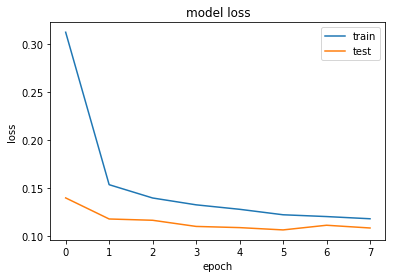

In [29]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');